<h1 style="color: black; background-color: white; width: 30vw">SETUP FUNCTIONS</h1>

In [18]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

dayHeights = []
times = []
heights = []

def cleanTime(timeStr):

    newTime = timeStr.split(":")
    mins = int(newTime[1])/60
    correctTime = round(float(newTime[0]) + mins, 2)
    return correctTime


def cleanDays():

    for height in range(len(heights)):
        if height != 0 and height % 2 != 0:
            dayHeights.append((heights[height] + heights[height - 1])/2)


with open('ASTR19_F25_group_project_data.txt', 'r') as f:
    for line in f:
        if "#" not in line:
            dataArr = line.strip().split()
            times.append(cleanTime(dataArr[1]))
            heights.append(float(dataArr[2]))

cleanDays()

def basicFunc(times, a, f, shift, offset):
    return a * np.cos(f * times + shift) + offset

def getStd(heightsArr):
    mean = np.sum(heightsArr) / len(heightsArr)
    variance = np.sum((heightsArr - mean) ** 2) / (len(heightsArr) - 1)
    standardDev = np.sqrt(variance)
    return standardDev

<h1 style="color: black; background-color: white; width: 25vw">INTER DAY PLOT</h1>

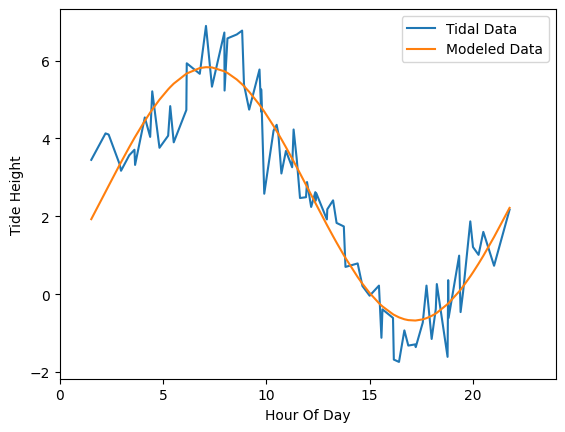

In [19]:
fig, axies = plt.subplots()

timesArr = np.array(times)
heightsArr = np.array(heights)

idxArr = np.argsort(timesArr)
sortedTimes = timesArr[idxArr]
sortedHeights = heightsArr[idxArr]

amplitude = .5 * (sortedHeights.max() - sortedHeights.min()) #Because thats how you calculate amplitude 

popt, __ = curve_fit(basicFunc, sortedTimes, sortedHeights, sigma=.25*np.ones_like(sortedHeights), p0=[amplitude, 0, 0, 0])

model = basicFunc(sortedTimes, popt[0], popt[1], popt[2], popt[3])

axies.plot(sortedTimes, sortedHeights, label="Tidal Data")
axies.plot(sortedTimes, model, label="Modeled Data")

axies.set_xlim(0, 24)
axies.set_xlabel("Hour Of Day")
axies.set_ylabel("Tide Height")
axies.legend()

plt.savefig("Inter-Day-Plot.pdf")
plt.show()

<h1 style="color: black; background-color: white; width: 50vw">INTER DAY RESIDUAL HISTOGRAM</h1>

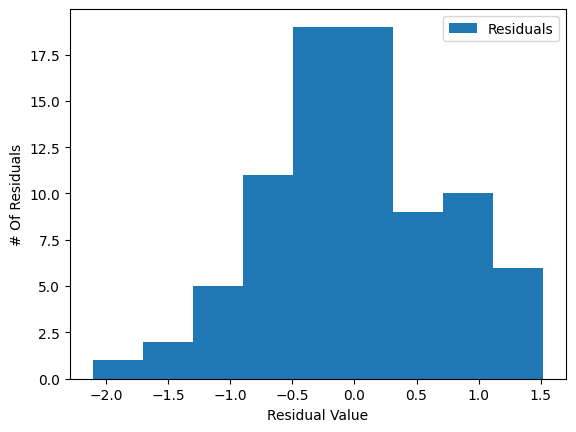

The estimated inter day intrisic scatter is 2.3822089058904607
It is True that the intrisic scatter is larger than the assumed experimental error


In [ ]:
fig, axies = plt.subplots()

timesArr = np.array(times)
heightsArr = np.array(heights)

idxArr = np.argsort(timesArr)
sortedTimes = timesArr[idxArr]
sortedHeights = heightsArr[idxArr]

amplitude = .5 * (sortedHeights.max() - sortedHeights.min()) #Because thats how you calculate amplitude 

popt, __ = curve_fit(basicFunc, sortedTimes, sortedHeights, sigma=.25*np.ones_like(sortedHeights), p0=[amplitude, 2 * np.pi / 14, 0, 0])

model = basicFunc(sortedTimes, popt[0], popt[1], popt[2], popt[3])

residuals = []

for time in range(len(model)):
    residuals.append(sortedHeights[time] - model[time])


axies.hist(residuals, bins=int(np.sqrt(len(residuals))), label="Residuals")

axies.set_xlabel("Residual Value")
axies.set_ylabel("# Of Residuals")
axies.legend()

plt.savefig("Inter-Day-Hist.pdf")
plt.show()

standardDev = getStd(heightsArr)
intrisicScatter = ((standardDev ** 2) - (.25 ** 2)) ** 0.5

print(f"The estimated inter day intrisic scatter is {intrisicScatter}")
print(f"It is {intrisicScatter > 0.25} that the intrisic scatter is larger than the assumed experimental error")

<h1 style="color: black; background-color: white; width: 35vw">INTER DAY RESIDUAL PLOT</h1>

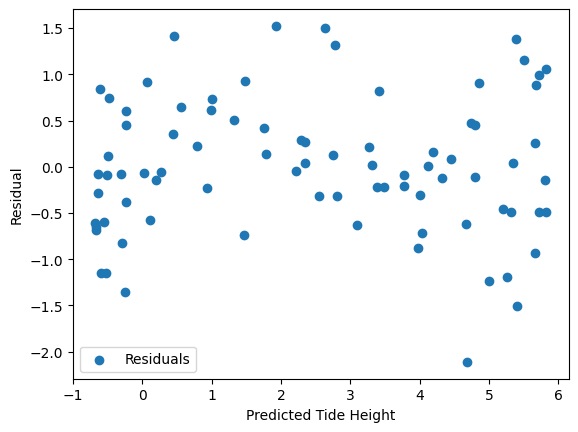

In [22]:
resFig, resAx = plt.subplots()


resAx.scatter(model, residuals, label="Residuals")

resAx.set_xlabel("Predicted Tide Height")
resAx.set_ylabel("Residual")
resAx.legend()

plt.savefig("Inter-Day-Plot-Residuals.pdf")
plt.show()

<h1 style="color: black; background-color: white; width: 60vw">TSUNAMI INTER DAY RESIDUAL HISTOGRAM</h1>

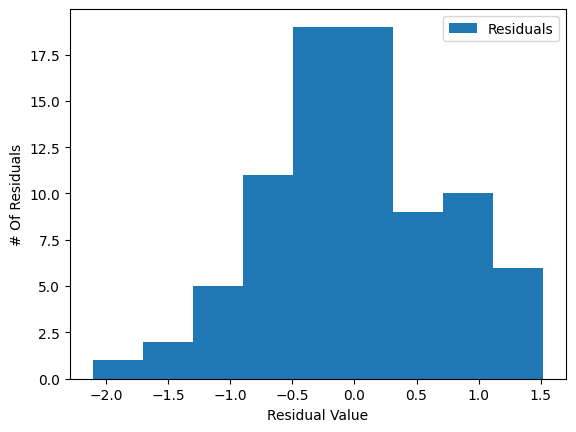

The Tsunami is 1.9828390025762346 standard deviations away from the average


In [ ]:
heightsArr[26] += 2

residuals = []

for time in range(len(model)):
    residuals.append(sortedHeights[time] - model[time])

fig, axies = plt.subplots()

axies.hist(residuals, bins=int(np.sqrt(len(residuals))), label="Residuals")

axies.set_xlabel("Residual Value")
axies.set_ylabel("# Of Residuals")
axies.legend()

plt.show()

mean = np.sum(heightsArr) / len(heightsArr)
standardDev = getStd(heightsArr)

stdAway = np.abs((heightsArr[26] - mean)/standardDev)
print(f'The Tsunami is {stdAway} standard deviations away from the average')

<h1 style="color: black; background-color: white; width: 50vw">TSUNAMI INTER DAY RESIDUAL PLOT</h1>

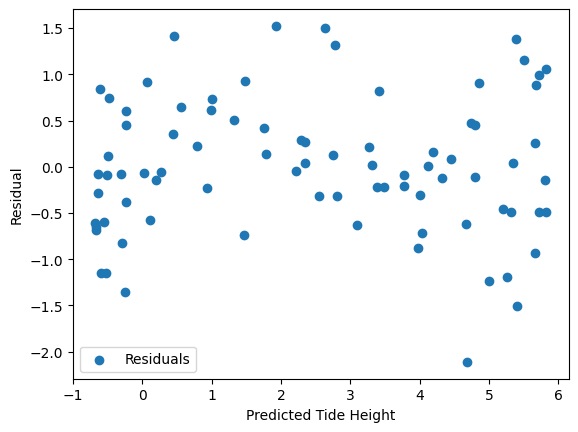

In [ ]:
resFig, resAx = plt.subplots()


resAx.scatter(model, residuals, label="Residuals")

resAx.set_xlabel("Predicted Tide Height")
resAx.set_ylabel("Residual")
resAx.legend()

plt.show()

<h1 style="color: black; background-color: white; width: 25vw">INTRA DAY PLOT</h1>

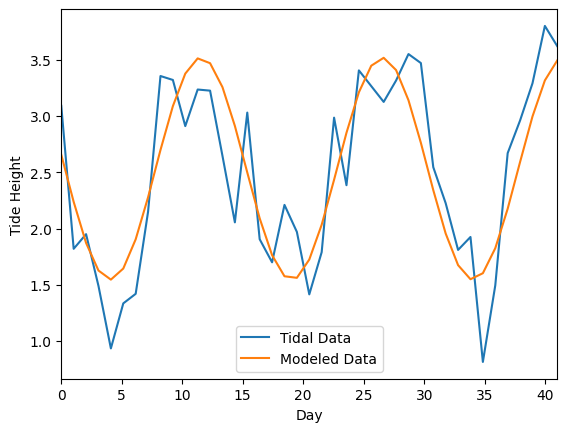

In [20]:
fig, axies = plt.subplots()

timesArr = np.linspace(0, 41, 41)
heightsArr = np.array(dayHeights)

amplitude = .5 * (heightsArr.max() - heightsArr.min()) #Because thats how you calculate amplitude 

popt, __ = curve_fit(basicFunc, timesArr, heightsArr, sigma=.25*np.ones_like(heightsArr), p0=[amplitude, 2 * np.pi / 14, 0, 0], maxfev=10000) #frequency is calculated as 2 * pi / period. Assume period of 14 because thats the length of the tidal cycle

model = basicFunc(timesArr, popt[0], popt[1], popt[2], popt[3])

axies.plot(timesArr, heightsArr, label="Tidal Data")
axies.plot(timesArr, model, label="Modeled Data")

axies.set_xlim(0, 41)
axies.set_xlabel("Day")
axies.set_ylabel("Tide Height")
axies.legend()

plt.savefig("Intra-Day-Plot.pdf")
plt.show()


<h1 style="color: black; background-color: white; width: 50vw">INTRA DAY RESIDUAL HISTOGRAM</h1>

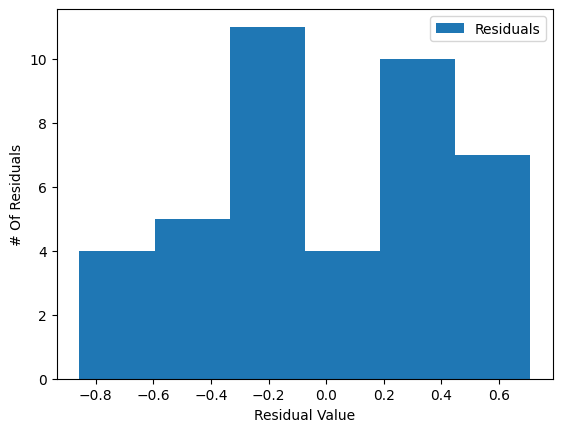

The estimated intra day intrisic scatter is 0.7775020978718462
It is True that the intrisic scatter is larger than the assumed experimental error


In [25]:
fig, axies = plt.subplots()

timesArr = np.linspace(0, 41, 41)
heightsArr = np.array(dayHeights)

amplitude = .5 * (heightsArr.max() - heightsArr.min()) #Because thats how you calculate amplitude 

popt, __ = curve_fit(basicFunc, timesArr, heightsArr, sigma=.25*np.ones_like(heightsArr), p0=[amplitude, 2 * np.pi / 14, 0, 0], maxfev=10000) #frequency is calculated as 2 * pi / period. Assume period of 14 because thats the length of the tidal cycle

model = basicFunc(timesArr, popt[0], popt[1], popt[2], popt[3])

residuals = []

for time in range(len(model)):
    residuals.append(heightsArr[time] - model[time])


axies.hist(residuals, bins=int(np.sqrt(len(residuals))), label="Residuals")

axies.set_xlabel("Residual Value")
axies.set_ylabel("# Of Residuals")
axies.legend()

plt.savefig("Intra-Day-Hist.pdf")
plt.show()

standardDev = getStd(heightsArr)
intrisicScatter = ((standardDev ** 2) - (.25 ** 2)) ** 0.5

print(f"The estimated intra day intrisic scatter is {intrisicScatter}")
print(f"It is {intrisicScatter > 0.25} that the intrisic scatter is larger than the assumed experimental error")

<h1 style="color: black; background-color: white; width: 35vw">INTRA DAY RESIDUAL PLOT</h1>

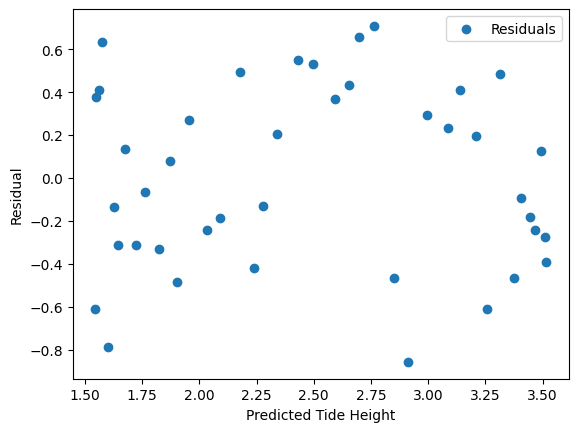

In [26]:
resFig, resAx = plt.subplots()


resAx.scatter(model, residuals, label="Residuals")

resAx.set_xlabel("Predicted Tide Height")
resAx.set_ylabel("Residual")
resAx.legend()

plt.savefig("Intra-Day-Plot-Residuals.pdf")
plt.show()

<h1 style="color: black; background-color: white; width: 60vw">TSUNAMI INTRA DAY RESIDUAL HISTOGRAM</h1>

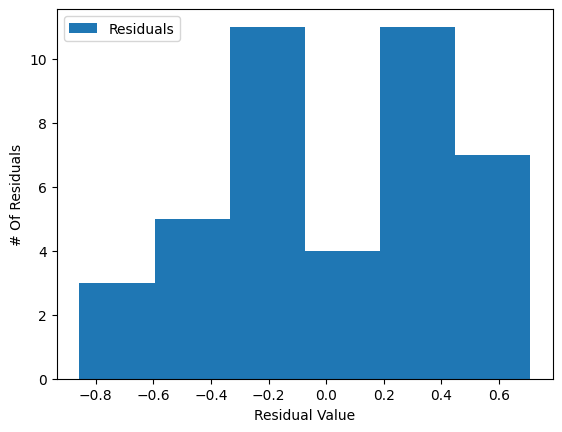

The Tsunami is 1.365588438660128 standard deviations away from the average


In [ ]:
heightsArr[13] += 1 #2 ft increase is 1ft avg over the low and high tide

residuals = []

for time in range(len(model)):
    residuals.append(heightsArr[time] - model[time])

fig, axies = plt.subplots()

axies.hist(residuals, bins=int(np.sqrt(len(residuals))), label="Residuals")

axies.set_xlabel("Residual Value")
axies.set_ylabel("# Of Residuals")
axies.legend()

plt.show()

mean = np.sum(heightsArr) / len(heightsArr)
standardDev = getStd(heightsArr)

stdAway = np.abs((heightsArr[13] - mean)/standardDev)
print(f'The Tsunami is {stdAway} standard deviations away from the average')

<h1 style="color: black; background-color: white; width: 50vw">TSUNAMI INTRA DAY RESIDUAL PLOT</h1>

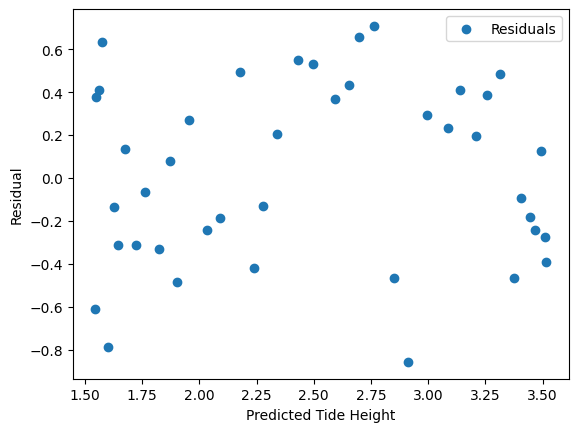

In [ ]:
resFig, resAx = plt.subplots()


resAx.scatter(model, residuals, label="Residuals")

resAx.set_xlabel("Predicted Tide Height")
resAx.set_ylabel("Residual")
resAx.legend()

plt.show()